In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
symbol = "ETHUSDT"
## Window
input_path = r"C:\Users\phamhoa\Downloads\thesis\data\Binance\agg\500"
df = pd.read_csv(rf"{input_path}\{symbol}.csv")

## Macbook
# input_path = "/Users/hoapham/Documents/Learning/thesis/data/Binance/agg/500"
# df = pd.read_csv(f"{input_path}/{symbol}.csv")
try:
    df = df.drop(columns=["Unnamed: 0"])
except:
    pass

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\phamhoa\\Downloads\\thesis\\data\\Binance\\agg\\500\\ETHUSDT.csv'

In [ ]:
# Dữ liệu thô khi tải từ Binance về
df.head()

,a,p,q,f,l,T,m,M
0,714586811,856.95,0.012,1153229029,1153229029,1757139824320,False,True
1,714586812,856.94,0.081,1153229030,1153229030,1757139824807,True,True
2,714586813,856.95,0.018,1153229031,1153229031,1757139824897,False,True
3,714586814,856.95,0.011,1153229032,1153229032,1757139825301,False,True
4,714586815,856.94,0.321,1153229033,1153229033,1757139825328,True,True


In [ ]:
cols = [
    "tradeId",
    "price",
    "quantity",
    "firstTradeId",
    "lastTradeId",
    "timestamp",
    "buyerMaker",
    "bestPriceMatch",
]
df.columns = cols
df = df[["timestamp", "price", "quantity", "buyerMaker"]]
df.head()


,timestamp,price,quantity,buyerMaker
0,1757139824320,856.95,0.012,False
1,1757139824807,856.94,0.081,True
2,1757139824897,856.95,0.018,False
3,1757139825301,856.95,0.011,False
4,1757139825328,856.94,0.321,True


In [ ]:
df[df["timestamp"] == df["timestamp"].min()]

,timestamp,price,quantity,buyerMaker
3999000,1756060468945,881.62,0.268,False
3999001,1756060468945,881.63,6.854,False
3999002,1756060468945,881.64,5.630,False
3999003,1756060468945,881.65,0.021,False
3999004,1756060468945,881.66,0.015,False
3999005,1756060468945,881.67,0.037,False
3999006,1756060468945,881.68,0.006,False
3999007,1756060468945,881.69,0.007,False
3999008,1756060468945,881.70,2.009,False
3999009,1756060468945,881.72,0.018,False


In [ ]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
df = df[["datetime", "price", "quantity", "buyerMaker"]]
df.head()

,datetime,price,quantity,buyerMaker
0,2025-09-06 06:23:44.320000+00:00,856.95,0.012,False
1,2025-09-06 06:23:44.807000+00:00,856.94,0.081,True
2,2025-09-06 06:23:44.897000+00:00,856.95,0.018,False
3,2025-09-06 06:23:45.301000+00:00,856.95,0.011,False
4,2025-09-06 06:23:45.328000+00:00,856.94,0.321,True


In [ ]:
df.tail()

,datetime,price,quantity,buyerMaker
3999995,2025-08-24 18:36:21.909000+00:00,881.90,0.024,True
3999996,2025-08-24 18:36:21.921000+00:00,881.90,0.013,True
3999997,2025-08-24 18:36:21.963000+00:00,881.90,0.029,True
3999998,2025-08-24 18:36:21.963000+00:00,881.89,0.020,True
3999999,2025-08-24 18:36:21.964000+00:00,881.89,0.487,True


In [ ]:
df['datetime'] = df['datetime'].dt.floor('S')
df.head()

,datetime,price,quantity,buyerMaker
0,2025-09-06 06:23:44+00:00,856.95,0.012,False
1,2025-09-06 06:23:44+00:00,856.94,0.081,True
2,2025-09-06 06:23:44+00:00,856.95,0.018,False
3,2025-09-06 06:23:45+00:00,856.95,0.011,False
4,2025-09-06 06:23:45+00:00,856.94,0.321,True


- buyerMaker cho biết buyer là maker hay taker:
    - buyerMaker = False → buyer là taker (mua chủ động ăn ask) ⇒ buy-initiated, giá khớp ở ask side
    - buyerMaker = True  → buyer là maker (đặt bid chờ, bị sell chủ động đập vào) ⇒ sell-initiated, giá khớp ở bid side
- => Hướng trade luôn xác định theo bên chủ động (taker).

In [ ]:
df['side'] = np.where(df['buyerMaker'], 'sell', 'buy')
df.head()

,datetime,price,quantity,buyerMaker,side
0,2025-09-06 06:23:44+00:00,856.95,0.012,False,buy
1,2025-09-06 06:23:44+00:00,856.94,0.081,True,sell
2,2025-09-06 06:23:44+00:00,856.95,0.018,False,buy
3,2025-09-06 06:23:45+00:00,856.95,0.011,False,buy
4,2025-09-06 06:23:45+00:00,856.94,0.321,True,sell


In [ ]:
agg = (df.groupby(['datetime', 'side'])
         .agg(price_mean=('price', 'mean'),
              qty_sum=('quantity', 'sum'))
         .reset_index()
         )

In [ ]:
price_wide = agg.pivot(index='datetime', columns='side', values='price_mean').add_prefix('price_')
qty_wide   = agg.pivot(index='datetime', columns='side', values='qty_sum').add_prefix('qty_')


In [ ]:
out_df = pd.concat([price_wide, qty_wide], axis=1).fillna(0.0)
out_df = out_df[['price_buy', 'price_sell', 'qty_buy', 'qty_sell']].sort_index()
out_df

side,price_buy,price_sell,qty_buy,qty_sell
datetime,,,,
2025-08-24 18:34:28+00:00,881.640645,881.600000,32.800,10.067
2025-08-24 18:34:29+00:00,881.607000,881.562857,9.447,14.137
2025-08-24 18:34:30+00:00,881.442727,881.467143,2.500,6.577
2025-08-24 18:34:31+00:00,881.450000,881.440000,0.028,0.031
2025-08-24 18:34:32+00:00,881.503793,881.600000,13.636,0.008
...,...,...,...,...
2025-09-06 06:29:15+00:00,857.640000,0.000000,0.122,0.000
2025-09-06 06:29:16+00:00,857.640000,857.630000,0.070,0.011
2025-09-06 06:29:18+00:00,857.640000,857.630000,0.020,0.352


In [ ]:
# Check lại một số vị trí có NaN
date_test = out_df.index[-1]
df[df["datetime"] == date_test]

,datetime,price,quantity,buyerMaker,side
999,2025-09-06 06:29:20+00:00,857.64,0.007,False,buy


In [ ]:
date_test = out_df.index[0]
df[df["datetime"] == date_test]

,datetime,price,quantity,buyerMaker,side
3999000,2025-08-24 18:34:28+00:00,881.62,0.268,False,buy
3999001,2025-08-24 18:34:28+00:00,881.63,6.854,False,buy
3999002,2025-08-24 18:34:28+00:00,881.64,5.630,False,buy
3999003,2025-08-24 18:34:28+00:00,881.65,0.021,False,buy
3999004,2025-08-24 18:34:28+00:00,881.66,0.015,False,buy
3999005,2025-08-24 18:34:28+00:00,881.67,0.037,False,buy
3999006,2025-08-24 18:34:28+00:00,881.68,0.006,False,buy
3999007,2025-08-24 18:34:28+00:00,881.69,0.007,False,buy
3999008,2025-08-24 18:34:28+00:00,881.70,2.009,False,buy
3999009,2025-08-24 18:34:28+00:00,881.72,0.018,False,buy


In [ ]:
# Tính V
out_df["total_qty"] = out_df["qty_buy"] + out_df["qty_sell"]
# resample theo ngày
daily_vol = out_df["total_qty"].resample("D").sum()

# bỏ ngày đầu và ngày cuối vì không đủ dữ liệu
daily_vol = daily_vol.iloc[1:-1]
# Tính Volume Bucket
V = int(daily_vol.mean() / 50)
out_df = out_df.drop(columns=["total_qty"])
V

3356

## Chia Buckets

In [ ]:
def get_buckets(df, bucketSize: float) -> pd.DataFrame:
    d = df.copy()
    buckets = []
    BV = SV = filled = 0.0  # Buy Vol, Sell Vol, đã lấp đầy trong bucket hiện tại

    # tích lũy cho trung bình giá mua/bán
    bid_price_num = 0.0   # sum(alloc_buy * price_buy)
    ask_price_num = 0.0   # sum(alloc_sell * price_sell)
    total_price_num = 0.0 # sum((alloc_buy*price_buy + alloc_sell*price_sell))

    for ts, row in d.iterrows():
        buy_remain  = float(row['qty_buy'])
        sell_remain = float(row['qty_sell'])
        total_remain = buy_remain + sell_remain

        while total_remain > 0:
            space = bucketSize - filled
            take = min(space, total_remain)

            # phân bổ theo tỷ lệ buy/sell còn lại
            buy_share = (buy_remain / total_remain) if total_remain > 0 else 0.0
            alloc_buy = take * buy_share
            alloc_sell = take - alloc_buy

            # cộng dồn volume
            BV += alloc_buy
            SV += alloc_sell

            # cộng dồn cho từng loại giá
            if alloc_buy > 0:
                bid_price_num += alloc_buy * float(row['price_buy'])
                total_price_num += alloc_buy * float(row['price_buy'])
            if alloc_sell > 0:
                ask_price_num += alloc_sell * float(row['price_sell'])
                total_price_num += alloc_sell * float(row['price_sell'])

            # cập nhật trạng thái
            filled += take
            buy_remain  -= alloc_buy
            sell_remain -= alloc_sell
            total_remain = buy_remain + sell_remain

            # đủ bucket → ghi lại
            if filled >= bucketSize - 1e-12:
                total_vol = BV + SV
                bid_mean = (bid_price_num / BV) if BV > 0 else np.nan
                ask_mean = (ask_price_num / SV) if SV > 0 else np.nan
                avg_price = (total_price_num / total_vol) if total_vol > 0 else np.nan

                buckets.append({
                    'Time': ts,
                    'Buy': BV,
                    'Sell': SV,
                    'Price': avg_price,    # giá chung (VWAP toàn bucket)
                    'BidPrice': bid_mean,  # giá mua trung bình
                    'AskPrice': ask_mean   # giá bán trung bình
                })

                # reset cho bucket mới
                BV = SV = filled = 0.0
                bid_price_num = ask_price_num = total_price_num = 0.0

    return pd.DataFrame(buckets)


In [ ]:
# Xem thử kết quả
df_buckets = get_buckets(out_df, V)
df_buckets["volumn"] = df_buckets["Buy"] + df_buckets["Sell"]
df_buckets

,Time,Buy,Sell,Price,BidPrice,AskPrice,volumn
0,2025-08-24 18:45:24+00:00,1802.741156,1553.258844,881.728005,881.876589,881.555556,3356.0
1,2025-08-24 19:10:11+00:00,1858.405179,1497.594821,880.097050,880.052775,880.151991,3356.0
2,2025-08-24 19:31:06+00:00,1803.229665,1552.770335,880.134309,880.211043,880.045199,3356.0
3,2025-08-24 19:34:33+00:00,1230.949753,2125.050247,873.011996,873.320582,872.833246,3356.0
4,2025-08-24 19:36:19+00:00,1632.295588,1723.704412,869.437922,869.522694,869.357645,3356.0
...,...,...,...,...,...,...,...
632,2025-09-06 03:44:24+00:00,2044.705558,1311.294442,858.377442,858.444184,858.273370,3356.0
633,2025-09-06 04:04:29+00:00,1595.687000,1760.313000,859.023810,859.150403,858.909056,3356.0
634,2025-09-06 04:31:45+00:00,2023.063992,1332.936008,858.862635,858.915534,858.782347,3356.0
635,2025-09-06 04:49:39+00:00,1810.571153,1545.428847,857.136780,856.992857,857.305396,3356.0


## Tính VPIN

In [ ]:

def calc_vpin(df, bucketSize, window):
    df_buckets = get_buckets(df, bucketSize)
    df_buckets["Volume"] = df_buckets["Buy"] + df_buckets["Sell"]

    # VPIN: rolling mean của |Buy - Sell| / V
    df_buckets['VPIN'] = abs(df_buckets['Buy'] - df_buckets['Sell']).rolling(window).mean() / bucketSize

    # CDF:
    df_buckets['CDF'] = df_buckets['VPIN'].rank(pct=True)

    return df_buckets


In [ ]:

vpin_df = calc_vpin(out_df, V, 50)
vpin_df

,Time,Buy,Sell,Price,BidPrice,AskPrice,Volume,VPIN,CDF
0,2025-08-24 18:45:24+00:00,1802.741156,1553.258844,881.728005,881.876589,881.555556,3356.0,NaN,NaN
1,2025-08-24 19:10:11+00:00,1858.405179,1497.594821,880.097050,880.052775,880.151991,3356.0,NaN,NaN
2,2025-08-24 19:31:06+00:00,1803.229665,1552.770335,880.134309,880.211043,880.045199,3356.0,NaN,NaN
3,2025-08-24 19:34:33+00:00,1230.949753,2125.050247,873.011996,873.320582,872.833246,3356.0,NaN,NaN
4,2025-08-24 19:36:19+00:00,1632.295588,1723.704412,869.437922,869.522694,869.357645,3356.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
632,2025-09-06 03:44:24+00:00,2044.705558,1311.294442,858.377442,858.444184,858.273370,3356.0,0.153843,0.801020
633,2025-09-06 04:04:29+00:00,1595.687000,1760.313000,859.023810,859.150403,858.909056,3356.0,0.152954,0.790816
634,2025-09-06 04:31:45+00:00,2023.063992,1332.936008,858.862635,858.915534,858.782347,3356.0,0.153817,0.799320
635,2025-09-06 04:49:39+00:00,1810.571153,1545.428847,857.136780,856.992857,857.305396,3356.0,0.149545,0.755102


In [ ]:
def plot_vpin(buckets, col):
    plt.figure(figsize=(12,6))
    plt.plot(buckets.index, buckets[col], label=f'{col}', linewidth=1.5)
    plt.title(f"{col} over time")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


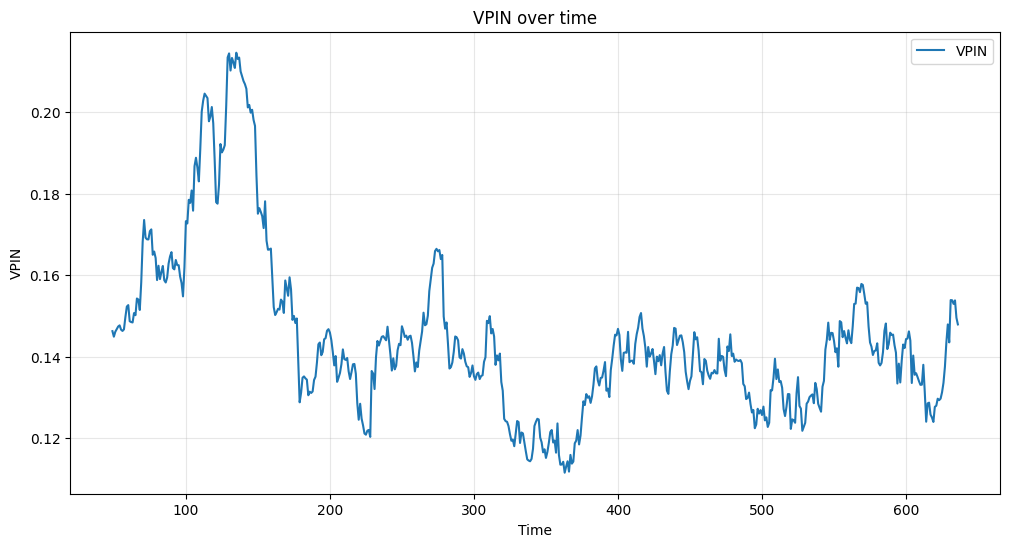

In [ ]:
plot_vpin(vpin_df, "VPIN")

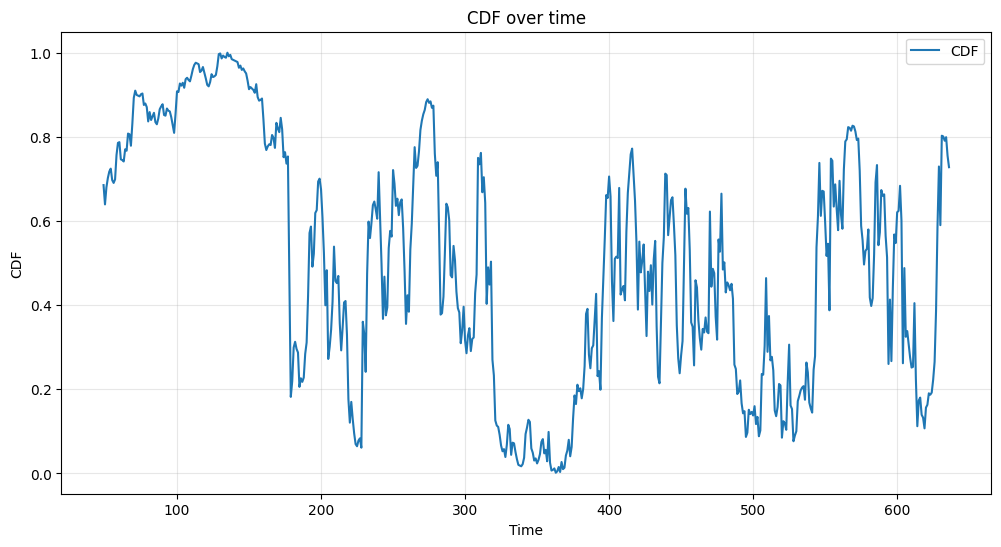

In [ ]:
plot_vpin(vpin_df, "CDF")

In [ ]:
vpin_path = f"{input_path}/VPIN"
if not os.path.exists(vpin_path):
    os.makedirs(vpin_path)


In [ ]:
vpin_df.to_csv(f"{vpin_path}/{symbol}.csv", index=False)